In [ ]:
import tensorflow  as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define Constants
TRAIN_PATH = '/content/drive/MyDrive/DATASET'
TEST_PATH = '/content/drive/MyDrive/TESTING'

BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
NUM_CLASSES = 2
EPOCHS = 200

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    # rotation_range = 45,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'reflect',
)
# dataset = []
# image_directory = '/content/drive/MyDrive/DATASET'
# SIZE = 224
# my_images = os.listdir('/content/drive/MyDrive/DATASET')

# for i, image_name in enumerate(my_images):
#   if(image_name.split('.')[0] == 'png'):
#     image = io.imread(image_directory+image_name)
#     image = Image.fromarray(image,'RGB')
#     image = image.resize(SIZE,SIZE)
#     dataset.append(nparray(image))

# x = np.array(dataset)

i=0
for batch in datagen.flow_from_directory(directory = '/content/drive/MyDrive/DATASET',
                                         batch_size = 16,
                                         target_size = (224,224),
                                         color_mode = "rgb",
                                         save_to_dir = '/content/drive/MyDrive/ULCER',
                                         save_prefix = 'aug',
                                         save_format = 'png'):
  
  i += 1
  if(i>=10):
    break
    
# # test data
# i=0
# for batch in datagen.flow_from_directory(directory = '/content/drive/MyDrive/TESTING',
#                                          batch_size = 16,
#                                          target_size = (224,224),
#                                          color_mode = "rgb",
#                                          save_to_dir = '/content/drive/MyDrive/TESTING/testing dataset',
#                                          save_prefix = 'aug',
#                                          save_format = 'png'):
  
#   i += 1
#   if(i>10):
#     break

Found 41 images belonging to 2 classes.


In [4]:
train_ds = image_dataset_from_directory(
    TRAIN_PATH,
    labels = 'inferred',
    validation_split = 0.2,
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    subset = 'training',
    seed = 0
)

validation_ds = image_dataset_from_directory(
    TRAIN_PATH,
    labels = 'inferred',
    validation_split = 0.2,
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    subset = 'validation',
    seed = 0
)

Found 274 files belonging to 2 classes.
Using 220 files for training.
Found 274 files belonging to 2 classes.
Using 54 files for validation.


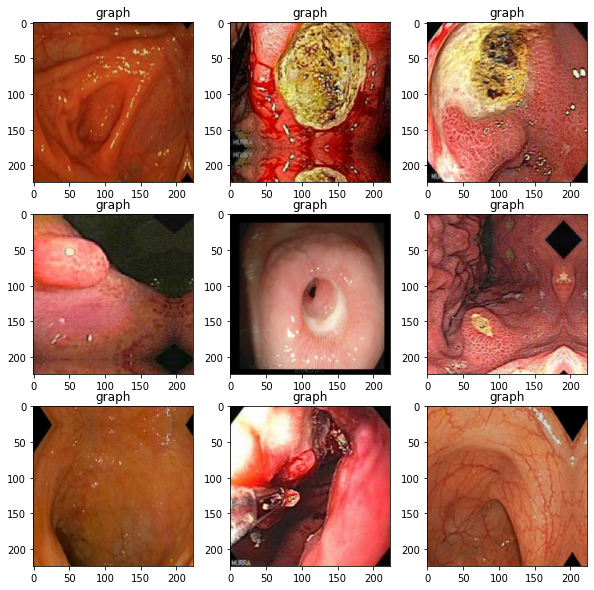

In [5]:
# Visualize the training & testing dataset
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("graph")
        plt.axis("on")


In [6]:
model = Sequential() 

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(0.5)) 

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(0.5))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')) 
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(0.5)) 

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(0.5)) 

model.add(Flatten()) 
model.add(Dense(64,activation='relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 111, 111, 32)     0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 64)       0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [ ]:
# def recall(y_true, y_pred):
#     y_true = K.ones_like(y_true)
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

#     recall = true_positives / (all_positives + K.epsilon())
#     return recall

# def precision(y_true, y_pred):
#     y_true = K.ones_like(y_true)
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_score(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
m1 = tf.keras.metrics.SpecificityAtSensitivity(0.5)
m2 = tf.keras.metrics.SensitivityAtSpecificity(0.5)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy',m1,m2])

In [16]:
history = model.fit(train_ds,validation_data=validation_ds, epochs = 10)

Epoch 1/10
7/7 [==============================] - 39s 5s/step - loss: 33.5055 - accuracy: 0.5636 - specificity_at_sensitivity: 0.6471 - sensitivity_at_specificity: 0.6000 - val_loss: 0.5934 - val_accuracy: 0.6852 - val_specificity_at_sensitivity: 1.0000 - val_sensitivity_at_specificity: 0.9189
Epoch 2/10
7/7 [==============================] - 29s 4s/step - loss: 0.6523 - accuracy: 0.6136 - specificity_at_sensitivity: 0.5294 - sensitivity_at_specificity: 0.6000 - val_loss: 0.6781 - val_accuracy: 0.6481 - val_specificity_at_sensitivity: 0.4118 - val_sensitivity_at_specificity: 0.4595
Epoch 3/10
7/7 [==============================] - 28s 4s/step - loss: 0.6135 - accuracy: 0.6136 - specificity_at_sensitivity: 0.8471 - sensitivity_at_specificity: 0.8148 - val_loss: 0.5301 - val_accuracy: 0.6852 - val_specificity_at_sensitivity: 1.0000 - val_sensitivity_at_specificity: 0.8108
Epoch 4/10
7/7 [==============================] - 30s 4s/step - loss: 0.5722 - accuracy: 0.6227 - specificity_at_sens

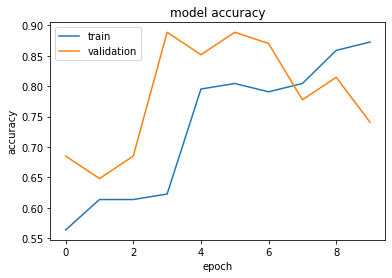

In [17]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation","tp","tn"], loc="upper left")
    plt.show()


plot_hist(history)


In [ ]:
import cv2

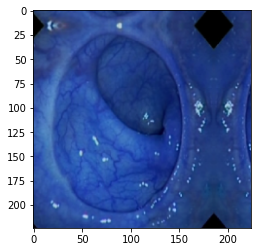

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/TESTING/testing dataset/aug_3_6236466.png')
plt.imshow(test_img)

In [ ]:
test_img.shape

(224, 224, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape(1,224,224,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 51ms/step


array([[0.00475441]], dtype=float32)